<a href="https://colab.research.google.com/github/Fluffstassy/HW_14/blob/main/PukhovaHW14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание к лекции "Визуализация данных"

Вам необходимо провести базовый EDA выбранного набора данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('russian_demography.csv')
df

,year,region,npg,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01
...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.00
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.00
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.50
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.70


In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,7

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


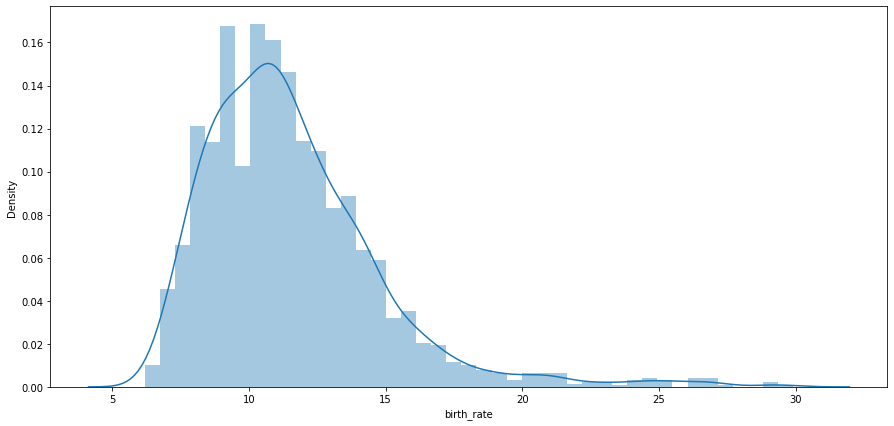

In [3]:
# распределение рождаемости в России (Рождаемость - число родившихся на 1000 человек)
sns.distplot(df.birth_rate)

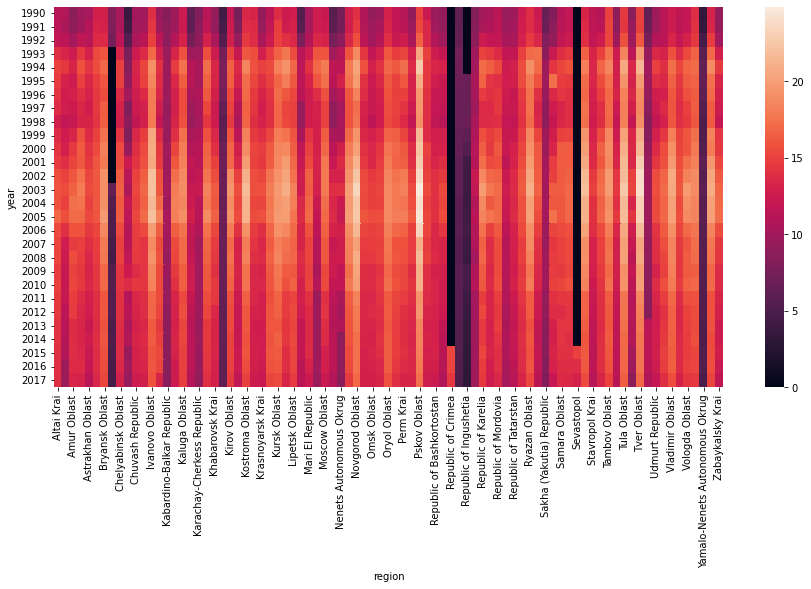

In [4]:
# Годовые смертности по регионам (Смертность - число смертей на 1000 человек)
annual_death_rate = df.pivot_table(
                        index='year', 
                        columns='region', 
                        values='death_rate', 
                        aggfunc=sum).fillna(0).applymap(float)

annual_death_rate
ax = sns.heatmap(annual_death_rate)

Из таблицы видно, что пик смертности, в основном во всех регионах, приходится на 2001-2006 года.

По республике Крым и Севастополю нет данных до 2014 года, так как этих регионов не было в составе России.

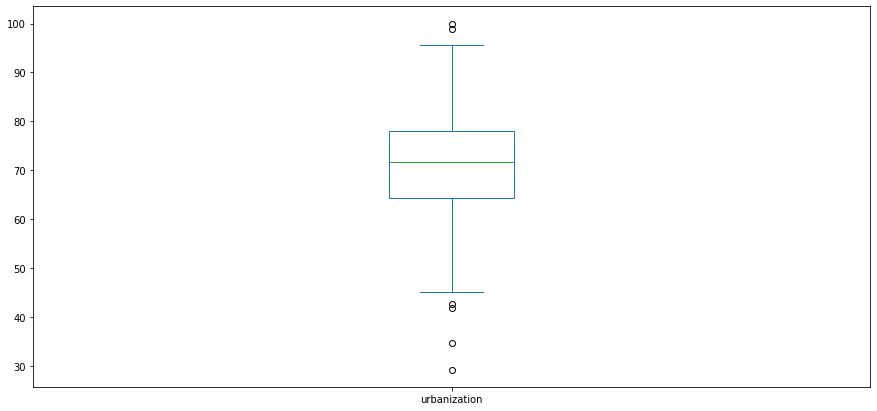

In [5]:
# Boxplot урбанизации в России в 2017 году
df[df["year"] == 2017]["urbanization"].plot.box()

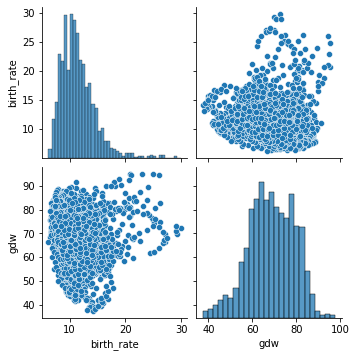

In [6]:
# Связь рождаемости и общего демографического веса (сколько человек нетрудоспособного возраста 
# приходится на 100 человек трудоспособного возраста) 
sns_plot = sns.pairplot(
    df[['birth_rate', 'gdw']])
sns_plot

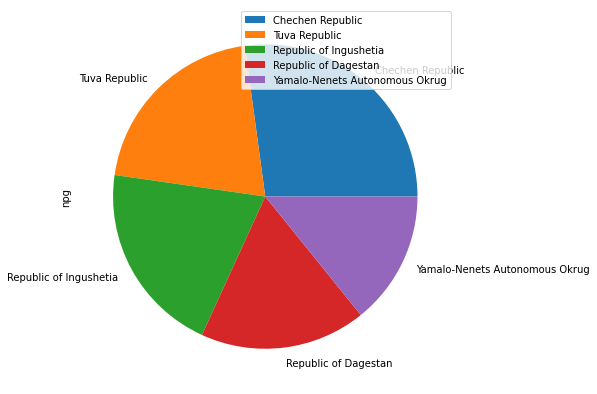

In [7]:
#круговая диаграмма естественного прироста населения на 1000 человек среди топ5 регионов по данному показателю
top5_npg_regions = df[df["year"]==2017][["region","npg"]].sort_values('npg',ascending=False).head(5)
top5_npg_regions.plot(kind='pie', y='npg',labels=top5_npg_regions["region"])

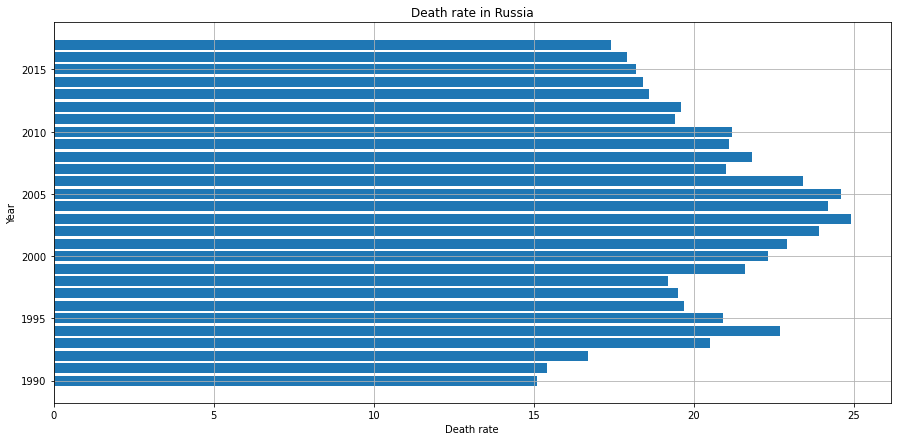

In [8]:
# Смертность в России
plt.barh(df["year"],df["death_rate"])
plt.xlabel('Death rate')
plt.ylabel('Year')
plt.title('Death rate in Russia')
plt.grid()